In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm
plt.style.use('/home/aos/kyan/.config/matplotlib/esm2m.mplstyle')
from dask.diagnostics import ProgressBar

In [2]:
# Load WBGT data, separating by macro-pertubation group
wbgt_1231 = xr.open_mfdataset('../data/processed/CESM2/Monthly_WBGT/monthly_wbgt_1231_*',combine='nested',concat_dim='ensemble').rename({'__xarray_dataarray_variable__':'WBGT'})
wbgt_1251 = xr.open_mfdataset('../data/processed/CESM2/Monthly_WBGT/monthly_wbgt_1251_*',combine='nested',concat_dim='ensemble').rename({'__xarray_dataarray_variable__':'WBGT'})
wbgt_1281 = xr.open_mfdataset('../data/processed/CESM2/Monthly_WBGT/monthly_wbgt_1281_*',combine='nested',concat_dim='ensemble').rename({'__xarray_dataarray_variable__':'WBGT'})

In [3]:
# Load land area data
land_area_cesm2 = xr.open_dataset('../data/processed/CESM2/cesm2.land_area')['__xarray_dataarray_variable__'].isel(ensemble=0).fillna(0)

In [4]:
# Function for global annual average
def global_avg(ds,area):
    global_ds = ds.weighted(area).mean(['lat','lon'])
    global_avg = global_ds.resample(time='1Y').mean()
    return global_avg

In [5]:
# Take global annual averages
with ProgressBar():
    wbgt_1231 = global_avg(wbgt_1231,land_area_cesm2)['WBGT'].compute()
    wbgt_1251 = global_avg(wbgt_1251,land_area_cesm2)['WBGT'].compute()
    wbgt_1281 = global_avg(wbgt_1281,land_area_cesm2)['WBGT'].compute()

[########################################] | 100% Completed |  4min 35.2s
[########################################] | 100% Completed |  4min 35.7s
[########################################] | 100% Completed |  4min 36.9s


In [7]:
# Adjust WBGT time range
wbgt_1231 = wbgt_1231.isel(time=slice(0,-1))
wbgt_1251 = wbgt_1251.isel(time=slice(0,-1))
wbgt_1281 = wbgt_1281.isel(time=slice(0,-1))

In [48]:
wbgt_1231['time'] = wbgt_1231['time.year']

In [50]:
wbgt_1251['time'] = wbgt_1251['time.year']
wbgt_1281['time'] = wbgt_1281['time.year']

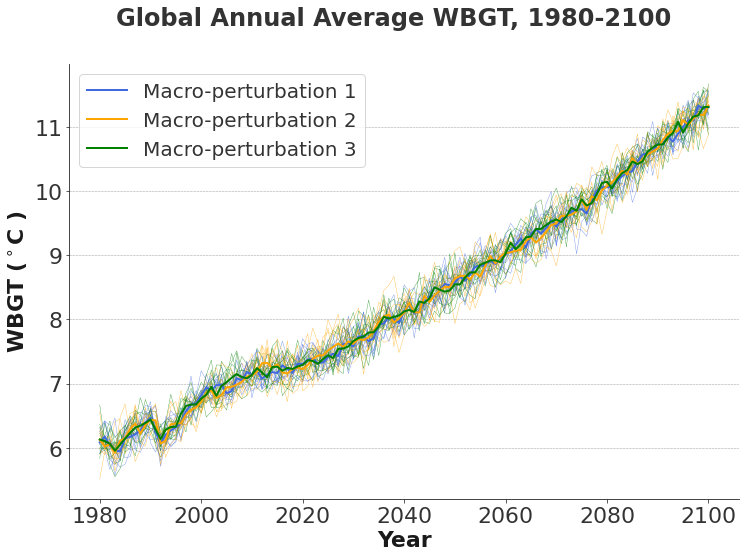

In [59]:
fig,ax = plt.subplots(figsize=(12,8))

for i in range (0,10):
    wbgt_1231.isel(ensemble=i).plot(ax=ax,color='royalblue',linewidth=0.4,alpha=0.75)
    wbgt_1251.isel(ensemble=i).plot(ax=ax,color='orange',linewidth=0.4,alpha=0.75)
    wbgt_1281.isel(ensemble=i).plot(ax=ax,color='green',linewidth=0.4,alpha=0.75)

wbgt_1231.mean('ensemble').plot(ax=ax,color='royalblue',linewidth=2)
wbgt_1251.mean('ensemble').plot(ax=ax,color='orange',linewidth=2)
wbgt_1281.mean('ensemble').plot(ax=ax,color='green',linewidth=2)

ax.set_ylabel('WBGT ($^\circ$C\t)',fontweight='bold');
ax.set_xlabel('Year',fontweight='bold');
ax.set_xticks(range(1980,2120,20));

blue_line = mlines.Line2D([], [], color='royalblue', label='Macro-perturbation 1',linewidth=2)
orange_line = mlines.Line2D([], [], color='orange', label='Macro-perturbation 2',linewidth=2)
green_line = mlines.Line2D([], [], color='green', label='Macro-perturbation 3',linewidth=2)

fig.suptitle('Global Annual Average WBGT, 1980-2100',fontweight='bold')
ax.legend(handles=[blue_line,orange_line,green_line],loc='upper left')